Grid 237: covers 15.469% of Chanthaburi, Temp: 28.03
Grid 238: covers 13.245% of Chanthaburi, Temp: 27.73
Grid 260: covers 6.550% of Chanthaburi, Temp: 27.43
Grid 261: covers 41.770% of Chanthaburi, Temp: 27.07
Grid 262: covers 22.247% of Chanthaburi, Temp: 27.28
Grid 284: covers 0.682% of Chanthaburi, Temp: 26.93
Grid 285: covers 0.037% of Chanthaburi, Temp: 27.92
Chanthaburi covers all grid: 100.00%
Average Temperature in Chanthaburi (weighted): 27.38


C:\Users\supakron\AppData\Local\Temp\ipykernel_14100\768746745.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\supakron\AppData\Local\Temp\ipykernel_14100\768746745.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


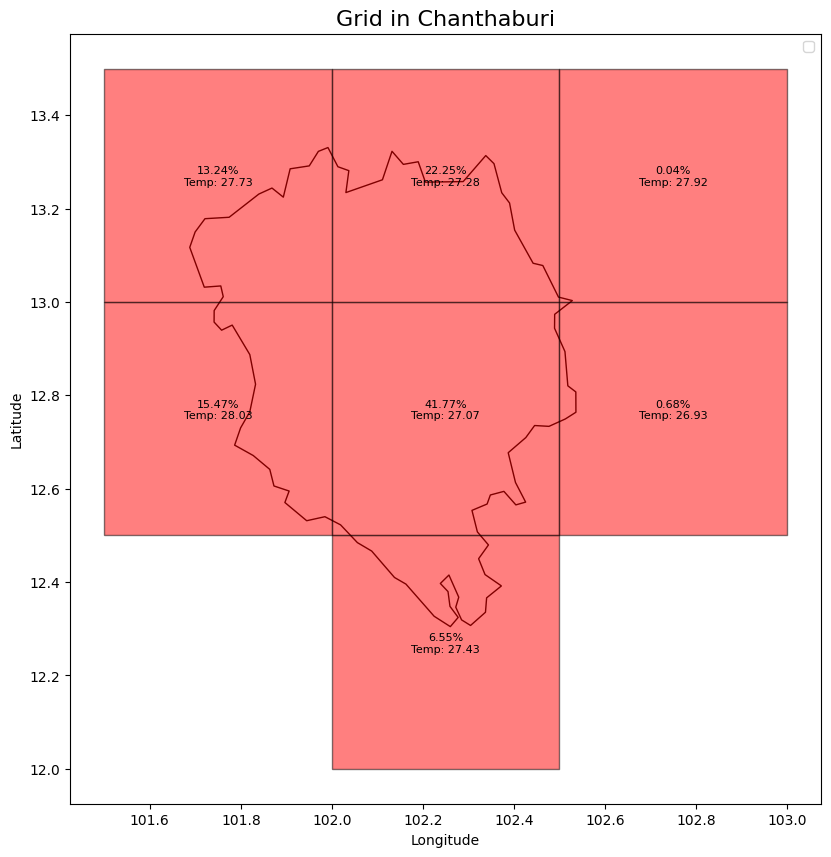

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2001.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# เลือกจังหวัดที่ต้องการ (เช่น จังหวัด "Bangkok Metropolis")
province_name = 'Chanthaburi'
province_coord = shapefile[shapefile['NAME_1'] == province_name]

# ตรวจสอบการตัดกันระหว่างกริดใน data กับเขตจังหวัดที่เลือก
# ทำการกรองเฉพาะกริดที่ตัดกับจังหวัดที่เลือก
grid_in_province = data[data.geometry.intersects(province_coord.geometry.union_all())]

# พื้นที่ของจังหวัดที่เลือก
province_area = province_coord.geometry.union_all().area

# สร้างแผนที่
fig, ax = plt.subplots(figsize=(10, 10))

# Plot เส้นเขตจังหวัดที่เลือก
province_coord.plot(ax=ax, color='white', edgecolor='black', alpha=1, label=province_name)

# Plot กริดที่ตัดกับจังหวัดที่เลือก
grid_in_province.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label=f'Grid in {province_name}')

# คำนวณสัดส่วนและอุณหภูมิเฉลี่ยแบบถ่วงน้ำหนัก
total_weighted_temp = 0
total_percentage = 0

for idx, grid in grid_in_province.iterrows():
    # พื้นที่ที่ตัดกันกับจังหวัดที่เลือก
    intersection_area = grid.geometry.intersection(province_coord.geometry.union_all()).area
    
    # คำนวณสัดส่วนการตัดกันของกริดที่เทียบกับพื้นที่จังหวัด
    intersection_percentage_of_province = (intersection_area / province_area) * 100
    
    # ค่า temperature ในกริด
    temperature_value = grid['temperature']
    
    temperature_value = np.nan_to_num(temperature_value, nan=0.0)
    
    # คำนวณค่าอุณหภูมิเฉลี่ยแบบถ่วงน้ำหนัก
    weighted_temp = temperature_value * intersection_percentage_of_province
    total_weighted_temp += weighted_temp
    total_percentage += intersection_percentage_of_province
    
    # แสดงสัดส่วนของกริดที่ตัดกันบนแผนที่
    # กำหนดตำแหน่งของข้อความบนกริด
    x, y = grid.geometry.centroid.x, grid.geometry.centroid.y
    ax.text(x, y, f'{intersection_percentage_of_province:.2f}%\nTemp: {temperature_value:.2f}', fontsize=8, ha='center', color='black')
    print(f"Grid {idx}: covers {intersection_percentage_of_province:.3f}% of {province_name}, Temp: {temperature_value:.2f}")

# คำนวณค่าอุณหภูมิเฉลี่ยถ่วงน้ำหนักสำหรับจังหวัดที่เลือก
average_temperature = total_weighted_temp / total_percentage if total_percentage != 0 else None
print(f'{province_name} covers all grid: {total_percentage:.2f}%')
print(f'Average Temperature in {province_name} (weighted): {average_temperature:.2f}')

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title(f'Grid in {province_name}', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# แสดงคำอธิบาย (legend)
plt.legend()

# แสดงผลแผนที่
plt.show()

# Export data to GEOJSON

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2001.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# เลือกจังหวัดที่ต้องการ (เช่น จังหวัด "Bangkok Metropolis")
province_name = 'Chanthaburi'
province_coord = shapefile[shapefile['NAME_1'] == province_name]

# ตรวจสอบการตัดกันระหว่างกริดใน data กับเขตจังหวัดที่เลือก
# ทำการกรองเฉพาะกริดที่ตัดกับจังหวัดที่เลือก
grid_in_province = data[data.geometry.intersects(province_coord.geometry.union_all())]

# สร้างแผนที่
#fig, ax = plt.subplots(figsize=(10, 10))

# Plot เส้นเขตจังหวัดที่เลือก
province_coord.plot(ax=ax, color='white', edgecolor='black', alpha=1, label=province_name)

# Plot กริดที่ตัดกับจังหวัดที่เลือก
grid_in_province.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label=f'Grid in {province_name}')

# คำนวณสัดส่วนและอุณหภูมิเฉลี่ยแบบถ่วงน้ำหนัก
total_weighted_temp = 0
total_percentage = 0

for idx, grid in grid_in_province.iterrows():
    # พื้นที่ที่ตัดกันกับจังหวัดที่เลือก
    intersection_area = grid.geometry.intersection(province_coord.geometry.union_all()).area
    
    # คำนวณสัดส่วนการตัดกันของกริดที่เทียบกับพื้นที่จังหวัด
    intersection_percentage_of_province = (intersection_area / province_area) * 100
    
    # ค่า temperature ในกริด
    temperature_value = grid['temperature']
    
    temperature_value = np.nan_to_num(temperature_value, nan=0.0)
    
    # คำนวณค่าอุณหภูมิเฉลี่ยแบบถ่วงน้ำหนัก
    weighted_temp = temperature_value * intersection_percentage_of_province
    total_weighted_temp += weighted_temp
    total_percentage += intersection_percentage_of_province
    
    # แสดงสัดส่วนของกริดที่ตัดกันบนแผนที่
    # กำหนดตำแหน่งของข้อความบนกริด
    x, y = grid.geometry.centroid.x, grid.geometry.centroid.y
    #ax.text(x, y, f'{intersection_percentage_of_province:.2f}%\nTemp: {temperature_value:.2f}', fontsize=8, ha='center', color='black')

# คำนวณค่าอุณหภูมิเฉลี่ยถ่วงน้ำหนักสำหรับจังหวัดที่เลือก
average_temperature = total_weighted_temp / total_percentage if total_percentage != 0 else None
print(f'{province_name} covers all grid: {total_percentage:.2f}%')
print(f'Average Temperature in {province_name} (weighted): {average_temperature:.2f}')

# บันทึกข้อมูลกริดที่ตัดกับจังหวัดเป็น GeoJSON
grid_in_province.to_file(f'../Geo-data/grid_in_{province_name}_geo.json', driver='GeoJSON')
print('Save data province to Geojson')

# # ปรับแต่งการแสดงผลเพิ่มเติม
# plt.title(f'Grid in {province_name}', fontsize=16)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # แสดงคำอธิบาย (legend)
# plt.legend()

# # แสดงผลแผนที่
# plt.show()


Chanthaburi covers all grid: 100.00%
Average Temperature in Chanthaburi (weighted): 21.75
Save data province to Geojson


# Visualize GEOJSON

C:\Users\supakron\AppData\Local\Temp\ipykernel_24320\4043037051.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\supakron\AppData\Local\Temp\ipykernel_24320\4043037051.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


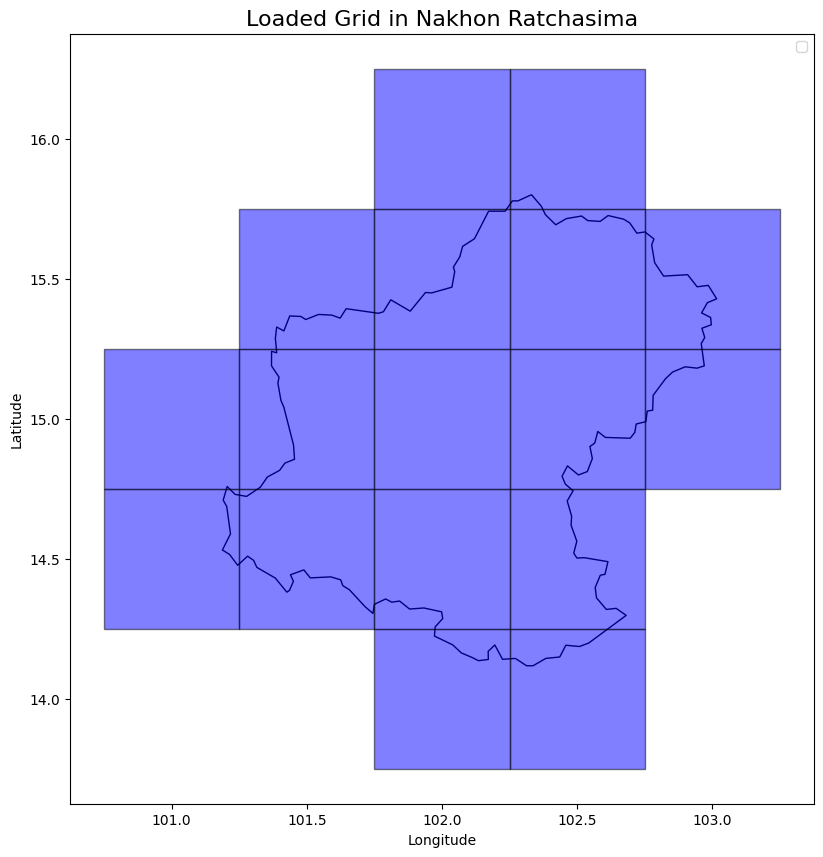

In [3]:
# โหลดข้อมูล GeoJSON ที่บันทึกมาแล้ว
grid_in_province_loaded = gpd.read_file('../Geo-data/grid_in_Nakhon Ratchasima_geo.json')

# สร้างแผนที่ใหม่
fig, ax = plt.subplots(figsize=(10, 10))

# Plot เส้นเขตจังหวัดที่เลือก
province_coord.plot(ax=ax, color='white', edgecolor='black', alpha=1, label=province_name)

# Plot กริดที่ตัดกับจังหวัดที่เลือกจากไฟล์ที่โหลดมา
grid_in_province_loaded.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label=f'Loaded Grid in {province_name}')

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title(f'Loaded Grid in {province_name}', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# แสดงคำอธิบาย (legend)
plt.legend()

# แสดงผลแผนที่
plt.show()
